In [1]:
# libraries

# Torch Libraries
import torch
from torch import nn

# Computer vision Libraries
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Visualization
import matplotlib.pyplot as plt

# Check Version
print(torch.__version__)
print(torchvision.__version__)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\DELL\AppData\Local\Programs\Python\Python39\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


1.13.1+cpu
0.14.0+cu117


Getting dataSet
The Dataset used is "Fashion MNIST(Modified National of Standards and Technology) DataBase"

In [2]:
train_data = datasets.FashionMNIST(root= "data",
                                   train = True,
                                   transform =torchvision.transforms.ToTensor(),
                                   download=True,
                                   target_transform=None)
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  transform= torchvision.transforms.ToTensor(),
                                  download=True,
                                  target_transform=None
                                  )     

In [3]:
len(train_data), len(test_data)

(60000, 10000)

see the first training example

In [4]:
sample_view ,label= train_data[0]
print(sample_view,label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

Viewing the class Label's

In [5]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Encoding the class names to the numbers

In [6]:
class_to_idx = train_data.class_to_idx
print(class_to_idx)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


Check the shape

In [7]:
print(f"Image Shape : {sample_view.shape} -> [c , h , w]")
print(f"Image Label : {train_data.train_labels}")

Image Shape : torch.Size([1, 28, 28]) -> [c , h , w]
Image Label : tensor([9, 0, 0,  ..., 3, 0, 5])


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Visualizing data 

(-0.5, 27.5, 27.5, -0.5)

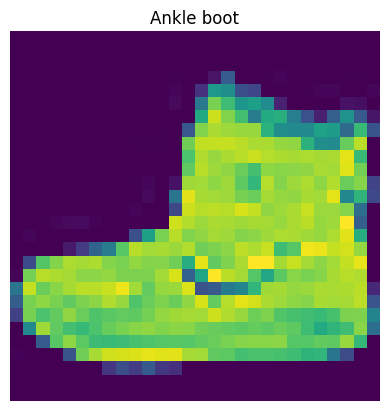

In [8]:
plt.imshow(sample_view.squeeze())
plt.title(label=class_names[label])
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

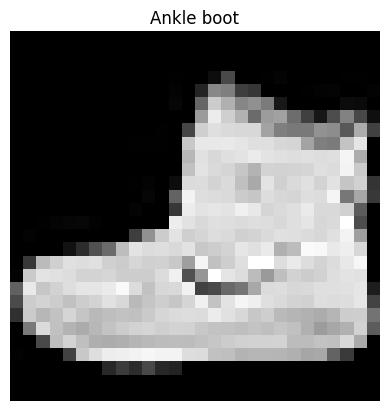

In [9]:
plt.imshow(sample_view.squeeze(),cmap="gray")
plt.title(label=class_names[label])
plt.axis(False)

View Random data

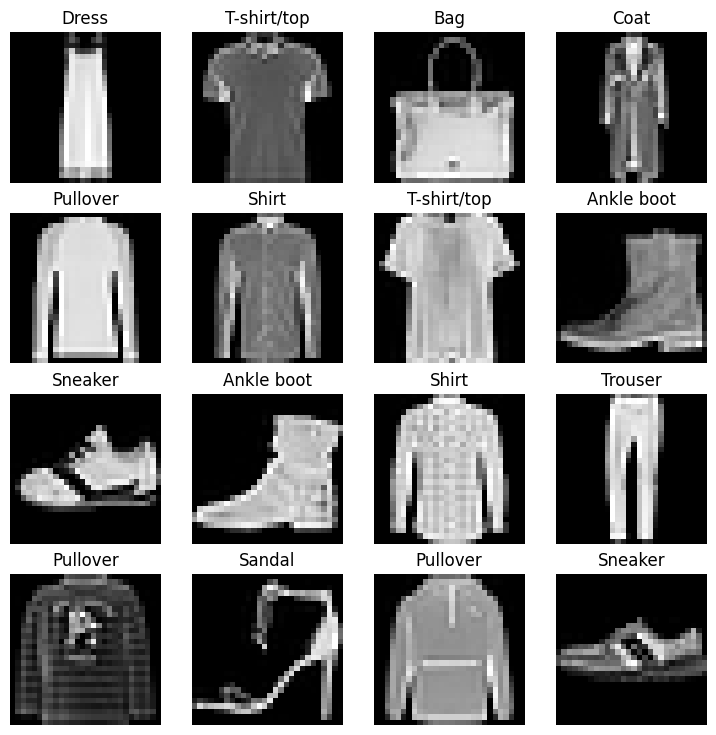

In [10]:
# torch.manual_seed(30)
plt.figure(figsize=(9,9))
rows , cols = 4 , 4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    img,l = train_data[random_idx]
    plt.subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[l])
    plt.axis(False)

modelled using? The items of clothing with pure Linear Line or Non-Linearity Line

In [11]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Preapare a DataLoader
DataLoader truns our dataset into a python iterable
We want to make our data into minibatches
why mini batches
1.It is more computational effeicent, as in, your computing hardware may not be able to look (store in memeory) at 6000images in one hit.
2.It give our neural network more chance to adjust it's gradient per epoch

In [12]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=True)

In [13]:
train_dataloader, test_dataloader 
print(f"Length Of train_dataloader : {len(train_dataloader)}  Batch Size : 32")
print(f"Length Of test_dataloader : {len(test_dataloader)}  Batch Size : 32")

Length Of train_dataloader : 1875  Batch Size : 32
Length Of test_dataloader : 313  Batch Size : 32


Check out what is inside the training dataloader

In [14]:
train_feature_batch , train_label_batch = next(iter(train_dataloader))
train_feature_batch , train_label_batch

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

showing batch data's

Iamge size : torch.Size([1, 28, 28])
label :6


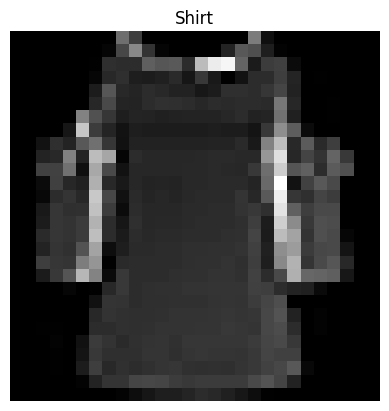

In [15]:
random_idx = torch.randint(0,len(train_feature_batch),size=[1]).item()
img , label = train_feature_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(label=class_names[label])
plt.axis(False)
print(f"Iamge size : {img.shape}")
print(f"label :{label}")

Building a baseline model
A basemodel is a simple model you will try and improve it over the subsquent models/experiments


In [16]:
# create a flatten model
flatten_model = nn.Flatten()
# get a sample
x = train_feature_batch[0]
# Flatten the sample
output = flatten_model(x)

print(f"shape before flattening: {x.shape}")
print(f"shape after flattening {output.shape}")


shape before flattening: torch.Size([1, 28, 28])
shape after flattening torch.Size([1, 784])


In [17]:
from torch import nn
class FashionMNISTModel(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape))
    def forward(self,x):
        return self.layer_stack(x)

In [44]:
torch.manual_seed(42)
# setup model with input parameter
model_0 = FashionMNISTModel(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [45]:
dummy_x = torch.randn([1,1,28,28])
model_0.forward(dummy_x)

tensor([[-0.2228,  0.1477,  0.3137, -0.3110, -0.3713,  0.0156,  0.4363,  0.1060,
         -0.1604, -0.4388]], grad_fn=<AddmmBackward0>)

In [46]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

step up loss , optimizer and evaluation metric

# Loss function is crossentropy
# optimizer SGD
# Accuracy as evaluation Metrics 

In [21]:
import requests
from pathlib import Path
# Download helper function from the zero to mastery repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already Exists, skipping download...")
else:
    print("Downloading helper_function.py...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)


helper_functions.py already Exists, skipping download...


In [22]:
from helper_functions import accuracy_fn

# setting up the loss and optimizer
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01)


In [23]:
# Creating to function to time our functions
from timeit import default_timer as timer
def print_train_timer(start : float,
                      end: float,
                      device : torch.device = None):
    total_time = end - start
    print(f"Train time in {device} : {total_time:.3f} seconods")

Creating a  training loop and training model on batch data
1.Loop through epochs
2.loop through training batches, perform training steps, calculate the train loss *per Batch*
3.Loop through the testing batch, perfoem testing steps, calculate the test loss *per Batch*

Make Prediction and get tge model_0 results

In [24]:
torch.manual_seed(42)
def evaluate_model(
        model : torch.nn.Module,
        data_loader : torch.utils.data.DataLoader,
        loss_fn : torch.nn.Module,
        accuracy_fn):
    loss,acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in  tqdm(data_loader):
            y_preds = model.forward(X)
            loss += loss_fn(y_preds,y)
            acc += accuracy_fn(y,y_preds.argmax(dim=1))
        loss/=len(data_loader)
        acc/= len(data_loader)
    return {"model_name" : model.__class__.__name__,
            "model_loss" : loss.item(),
            "model_acc" : acc}
model_0_results = evaluate_model(model=model_0,
                                 data_loader=test_dataloader,
                                 loss_fn=loss_fn,
                                 accuracy_fn=accuracy_fn)
model_0_results



NameError: name 'tqdm' is not defined

In [ ]:
# for batch, (X,y) in enumerate(train_dataloader):
#     print(batch)
#     print(y)

Creating a training and testing functions

In [ ]:
from tqdm.auto import tqdm
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
    train_loss , train_acc= 0,0
    model.train()
    for batch, (X,y) in enumerate(data_loader):
        
        y_preds = model(X)
        # loss per batch
        loss = loss_fn(y_preds,y)
        train_loss += loss
        train_acc+=accuracy_fn(y,y_preds.argmax(dim=1))
        # optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples.")

    train_loss = train_loss/len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train loss : {train_loss:.5f} | Train acc : {train_acc:.2f}%")

In [ ]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              ):
    test_loss,test_accu = 0,0
    model.eval()
    with torch.inference_mode():
        for X_test,y_test in data_loader:
            test_preds = model.forward(X_test)
            test_loss += loss_fn(test_preds,y_test)
            test_accu += accuracy_fn(y_test,test_preds.argmax(dim=1))
        test_loss /= len(data_loader)

        test_accu/= len(data_loader)

        print(f"Test loss: {test_loss:.4f} | Test_acc : {test_accu}%")
    
    

In [ ]:
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3
# creating training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n----")
    train_step(model_0,train_dataloader,loss_fn,accuracy_fn)
    test_step(model_0,test_dataloader,loss_fn,accuracy_fn)
train_time_end_on_cpu = timer()
total_train_time_model = print_train_timer(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
----
Looked at 0/60000 samples.
Looked at 400/60000 samples.
Looked at 800/60000 samples.
Looked at 1200/60000 samples.
Looked at 1600/60000 samples.
Train loss : 0.47683 | Train acc : 83.58%


 33%|███▎      | 1/3 [00:10<00:20, 10.23s/it]

Test loss: 0.4940 | Test_acc : 82.84744408945687
Epoch : 1
----
Looked at 0/60000 samples.
Looked at 400/60000 samples.
Looked at 800/60000 samples.
Looked at 1200/60000 samples.
Looked at 1600/60000 samples.
Train loss : 0.46054 | Train acc : 83.97%


 67%|██████▋   | 2/3 [00:20<00:10, 10.06s/it]

Test loss: 0.4927 | Test_acc : 82.82747603833866
Epoch : 2
----
Looked at 0/60000 samples.
Looked at 400/60000 samples.
Looked at 800/60000 samples.
Looked at 1200/60000 samples.
Looked at 1600/60000 samples.
Train loss : 0.44910 | Train acc : 84.47%


100%|██████████| 3/3 [00:30<00:00, 10.10s/it]

Test loss: 0.4764 | Test_acc : 83.4564696485623
Train time in cpu : 30.317 seconods


In [ ]:
model_0_results